In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('smoke_detection_iot.csv')
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']


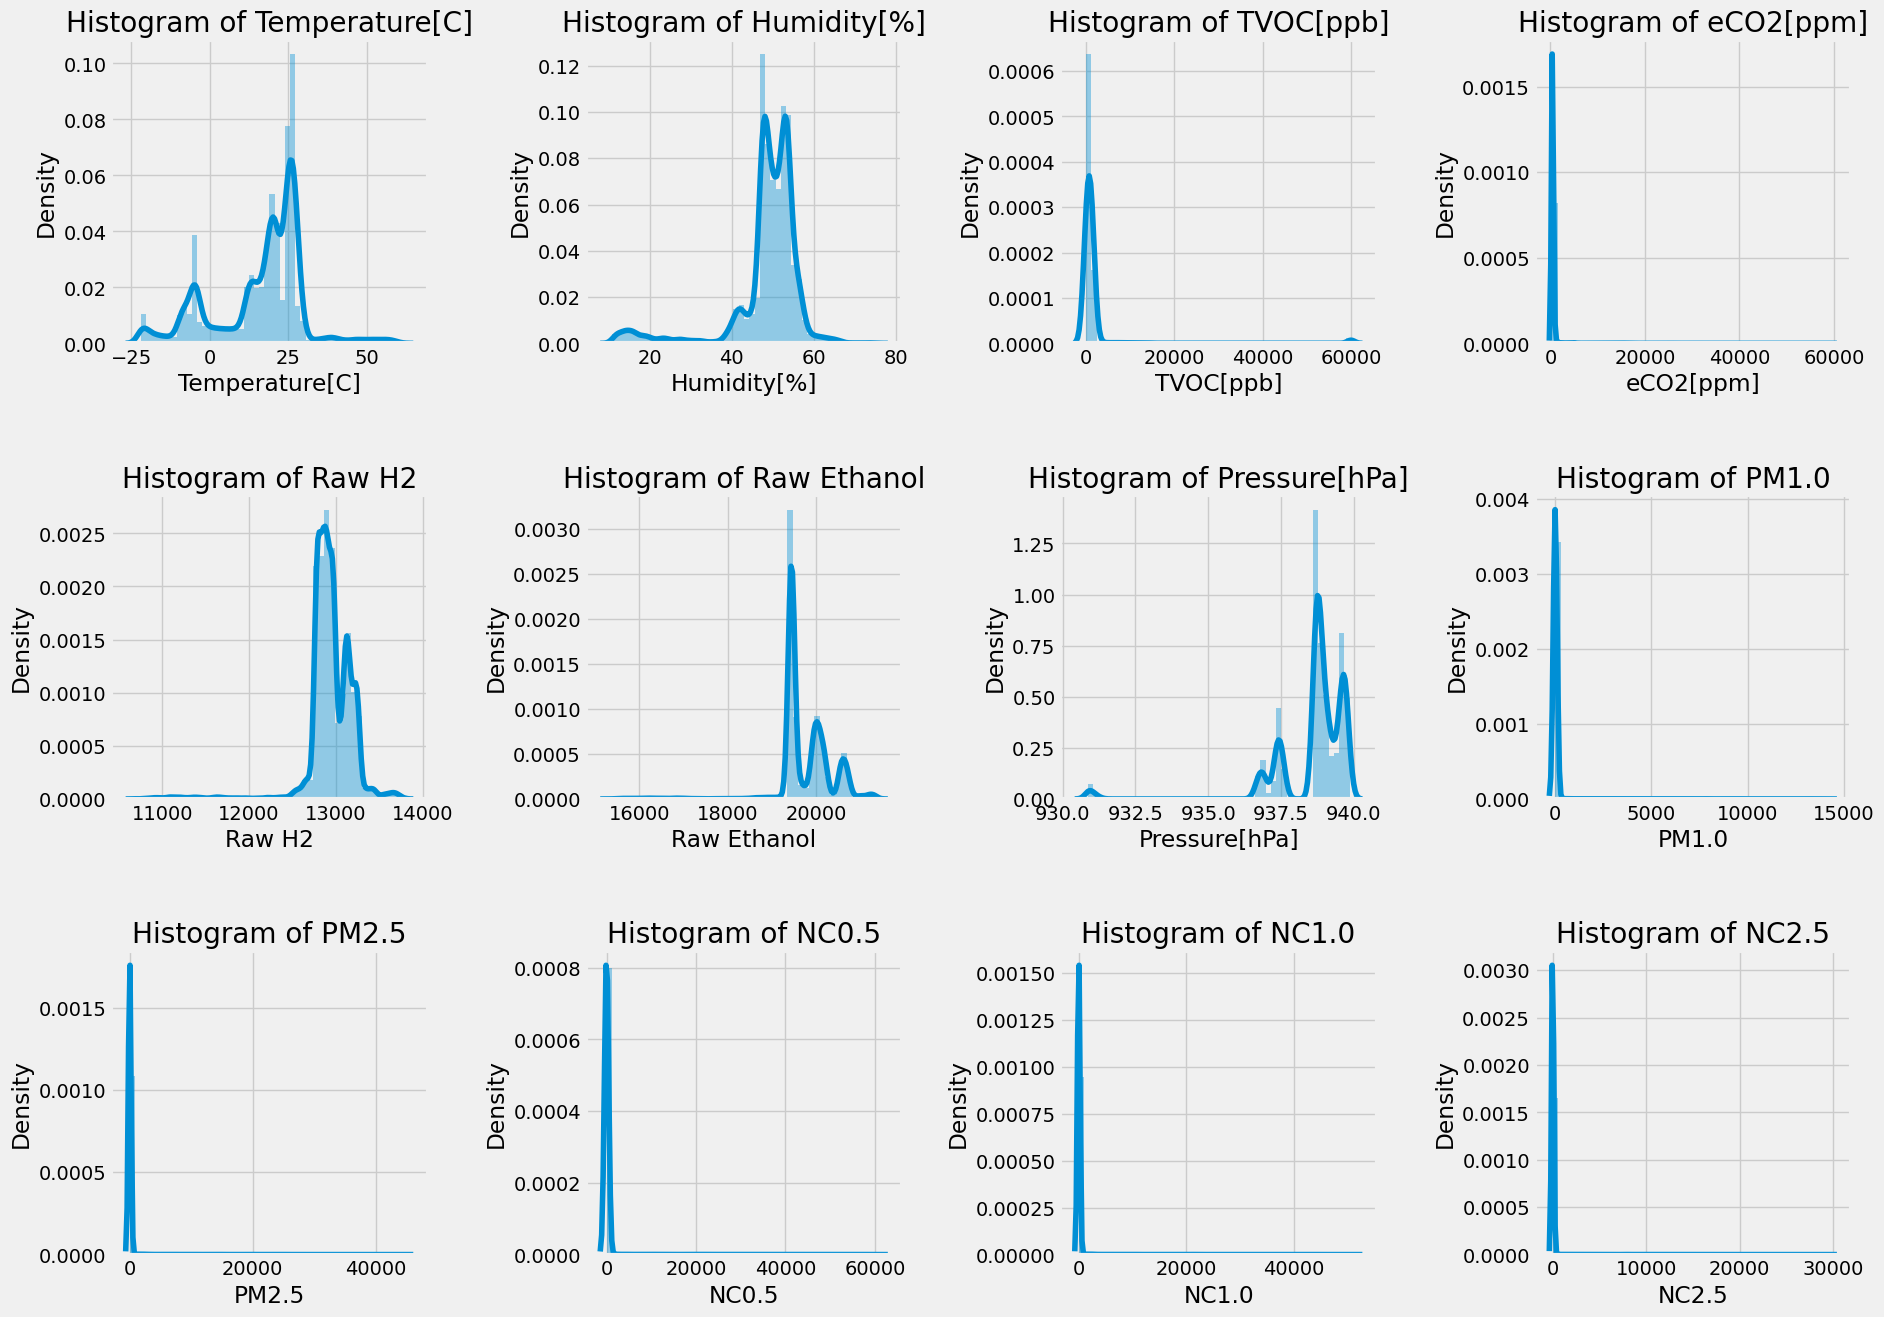

In [3]:
df_smokeDetection = df.iloc[:, 2:-2]
df_smokeDetection['FireAlarm'] = df['Fire Alarm']
df_smokeDetection.head()
feature_names = []
for name in df_smokeDetection.columns:
    feature_names.append(name)

feature_names.remove('FireAlarm')
print(feature_names)
plt.style.use('fivethirtyeight')

plt.figure(1 , figsize = (20 , 15))

n = 0
for x in feature_names:
    
    n += 1
    plt.subplot(3 , 4 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(a = df_smokeDetection[x] , bins = 50 )
    plt.title('Histogram of {}'.format(x))
    
plt.show()

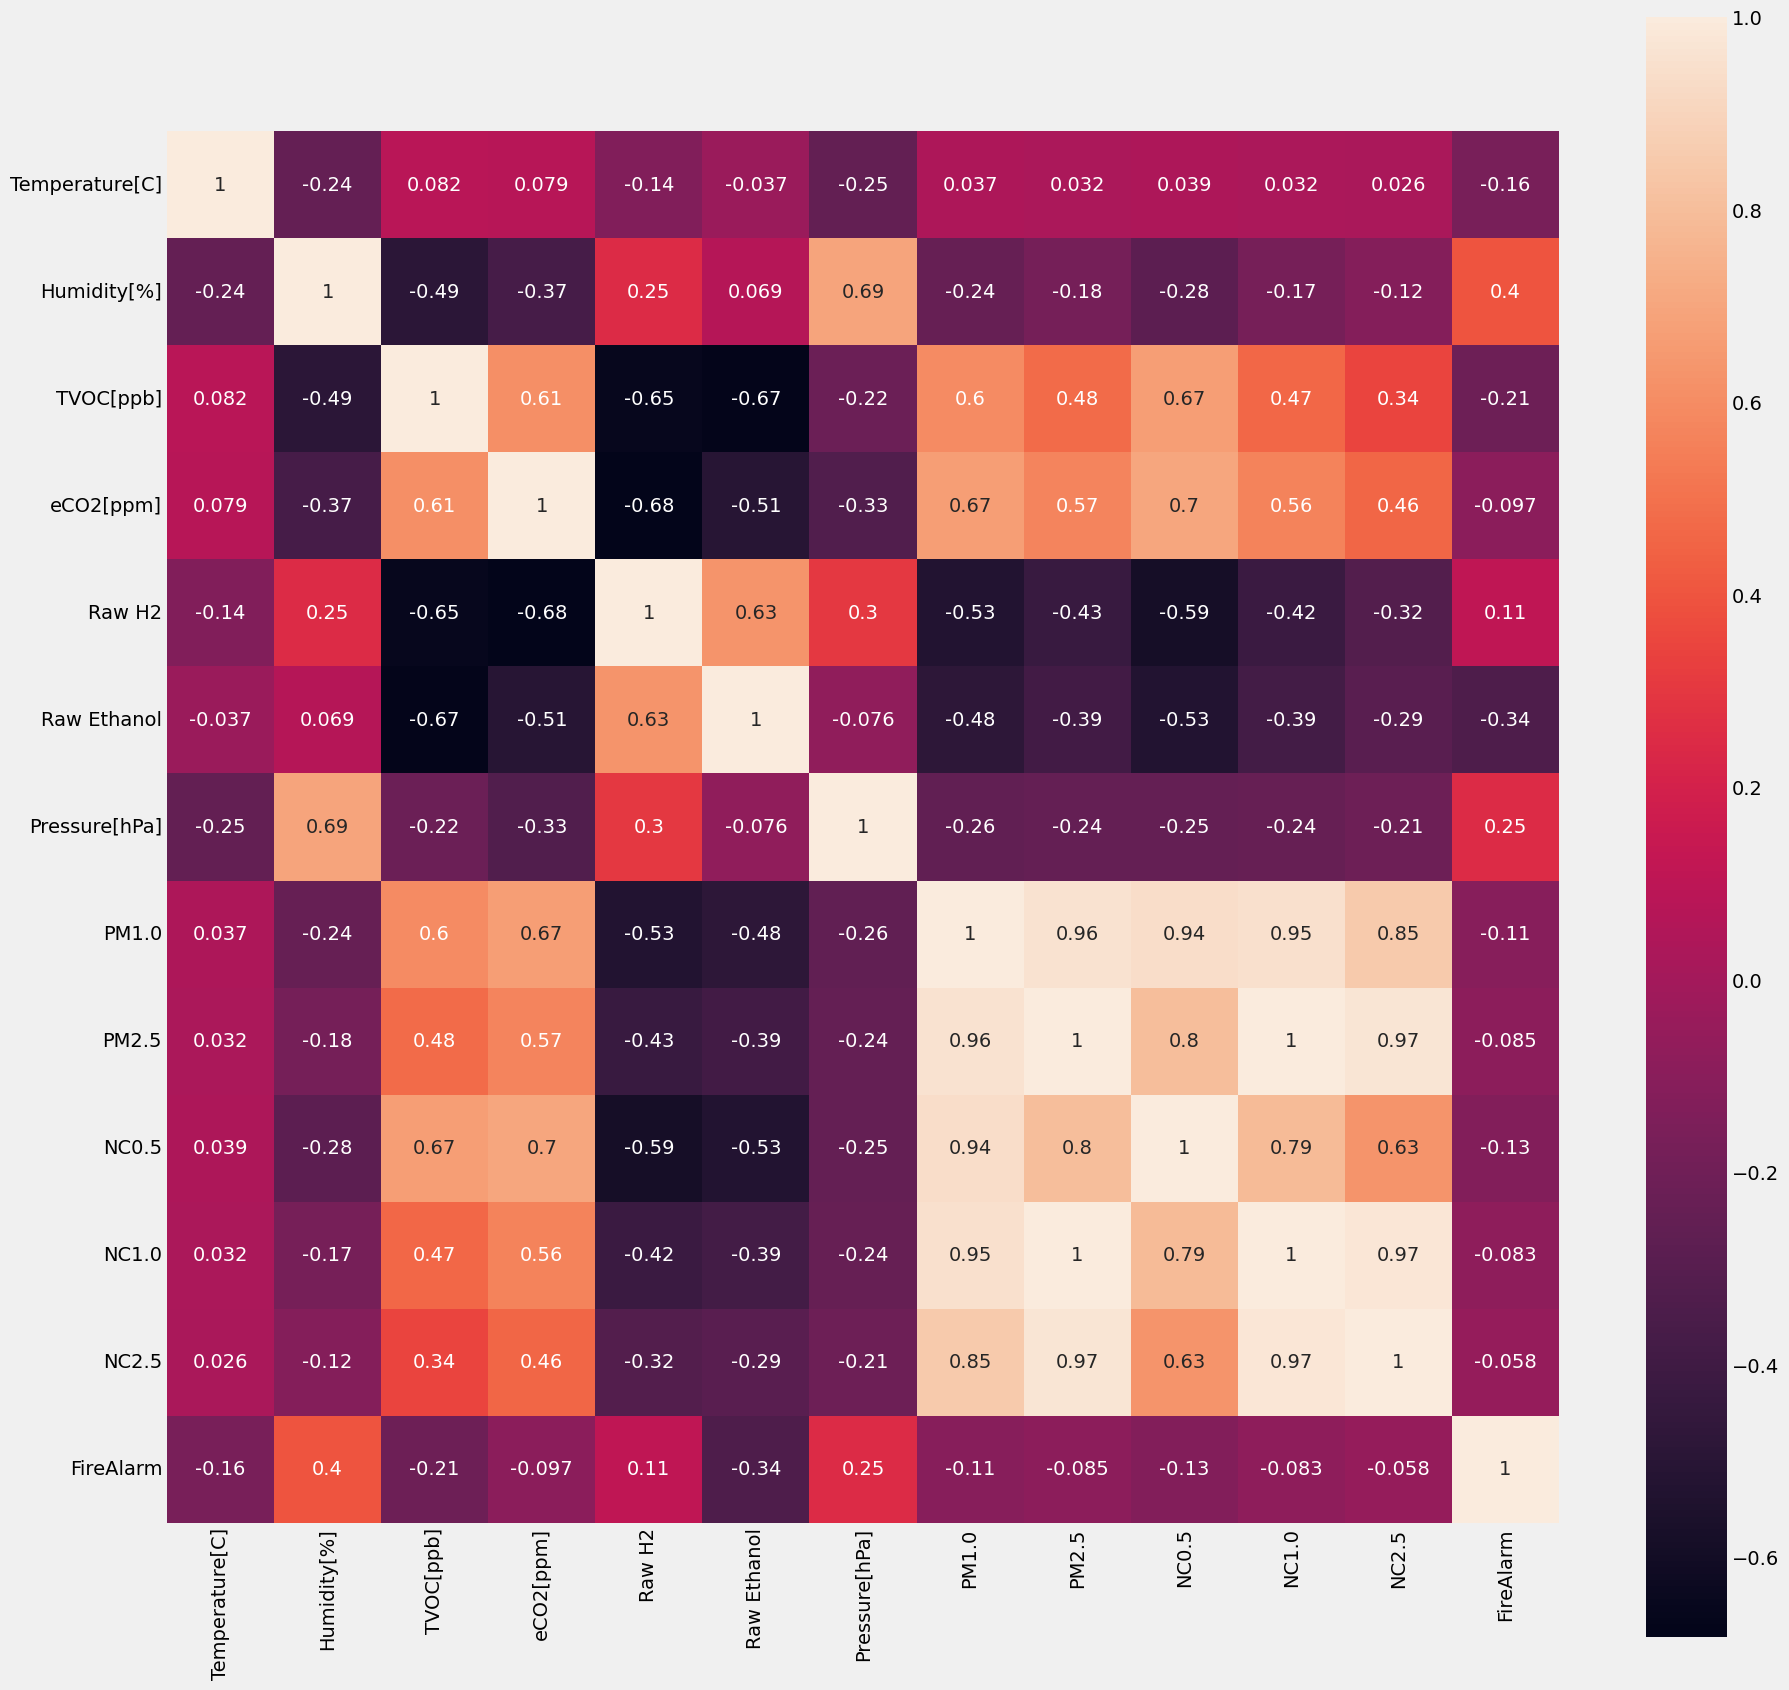

In [4]:
cor = df_smokeDetection.corr()
plt.figure(1 , figsize = (20 , 20))
sns.heatmap(cor , annot = True , square = True)
plt.show()

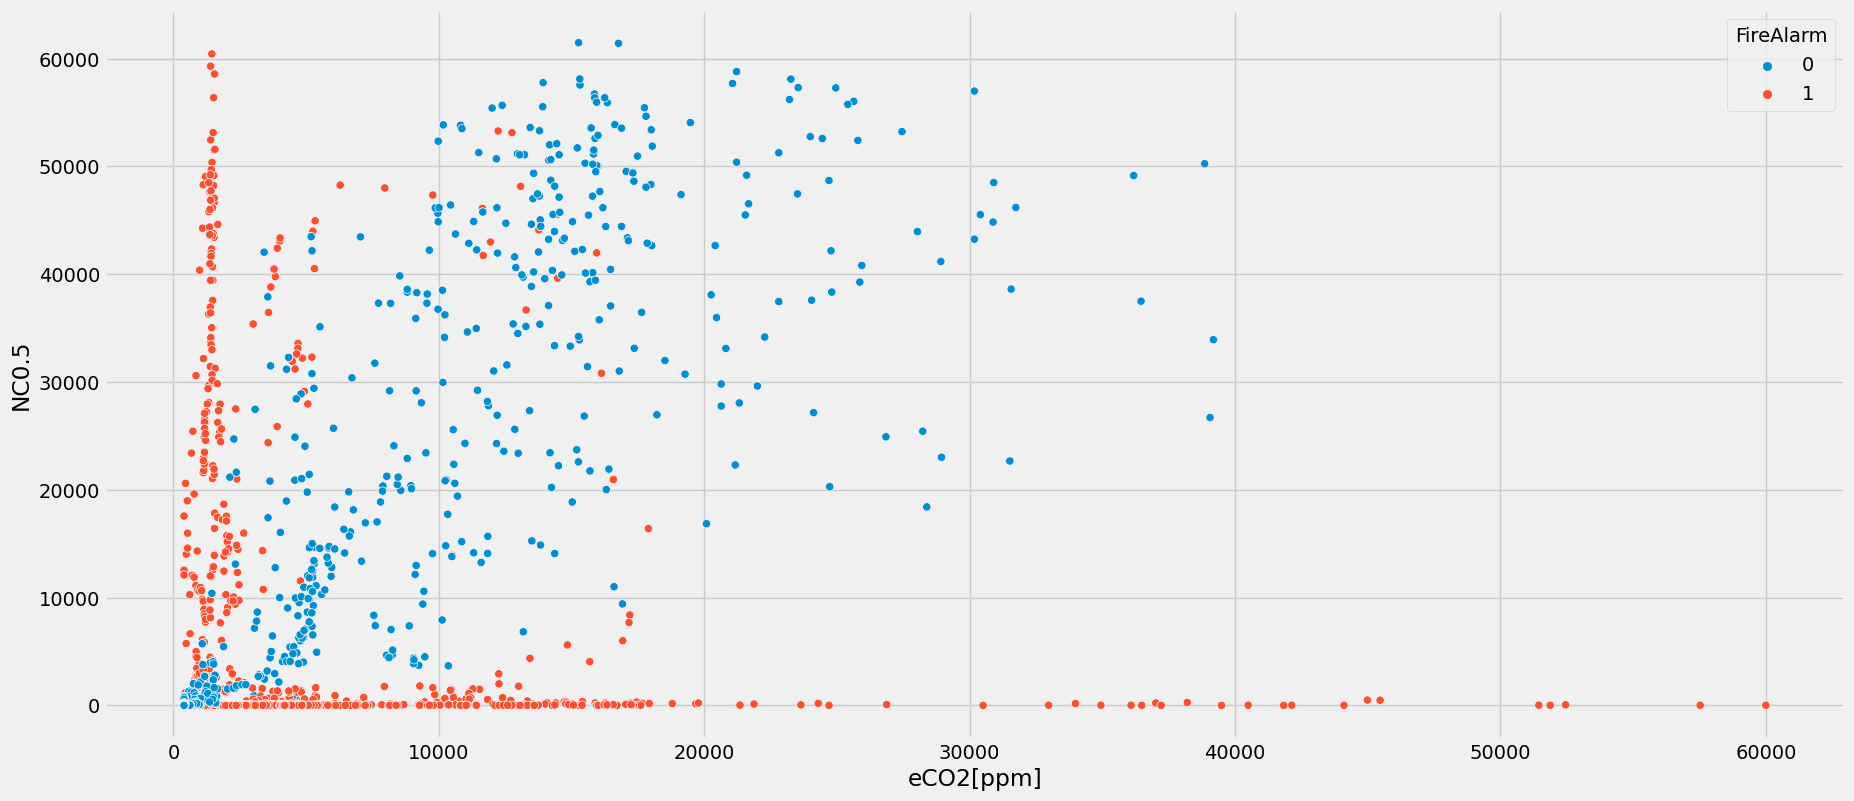

In [6]:
plt.figure(1 , figsize = (20 , 9))

sns.scatterplot(x = 'eCO2[ppm]' , y  = 'NC0.5' , hue = 'FireAlarm' , data = df_smokeDetection)
plt.show()

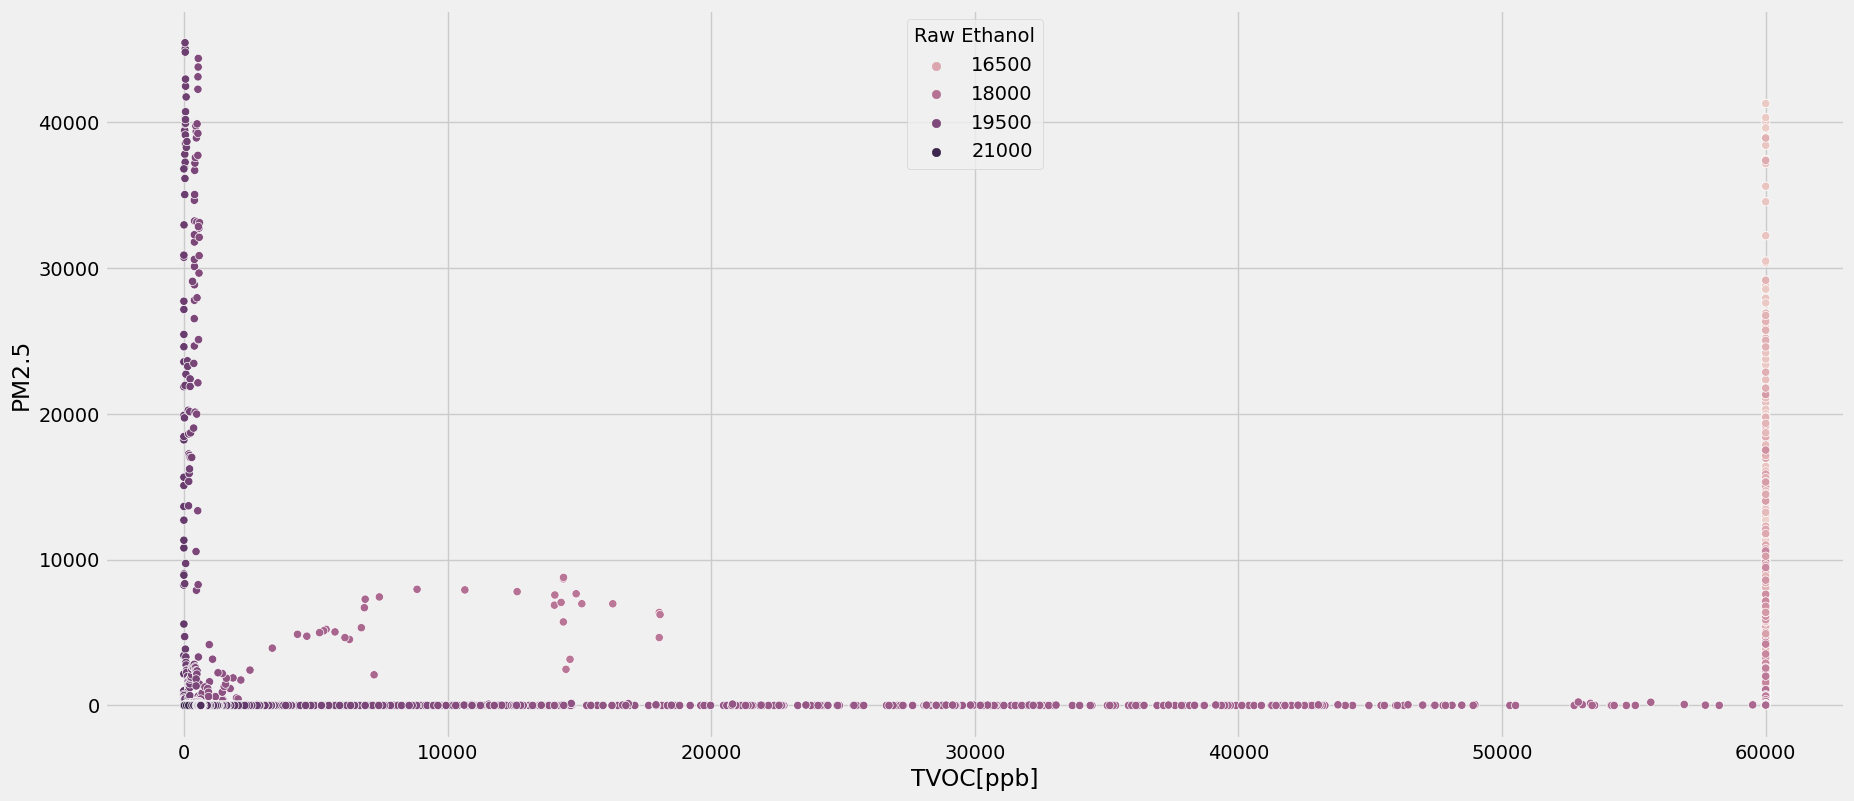

In [7]:
plt.figure(1 , figsize = (20 , 9))
sns.scatterplot(x = 'TVOC[ppb]' , y  = 'PM2.5' , hue = 'Raw Ethanol' , data = df_smokeDetection)
plt.show()

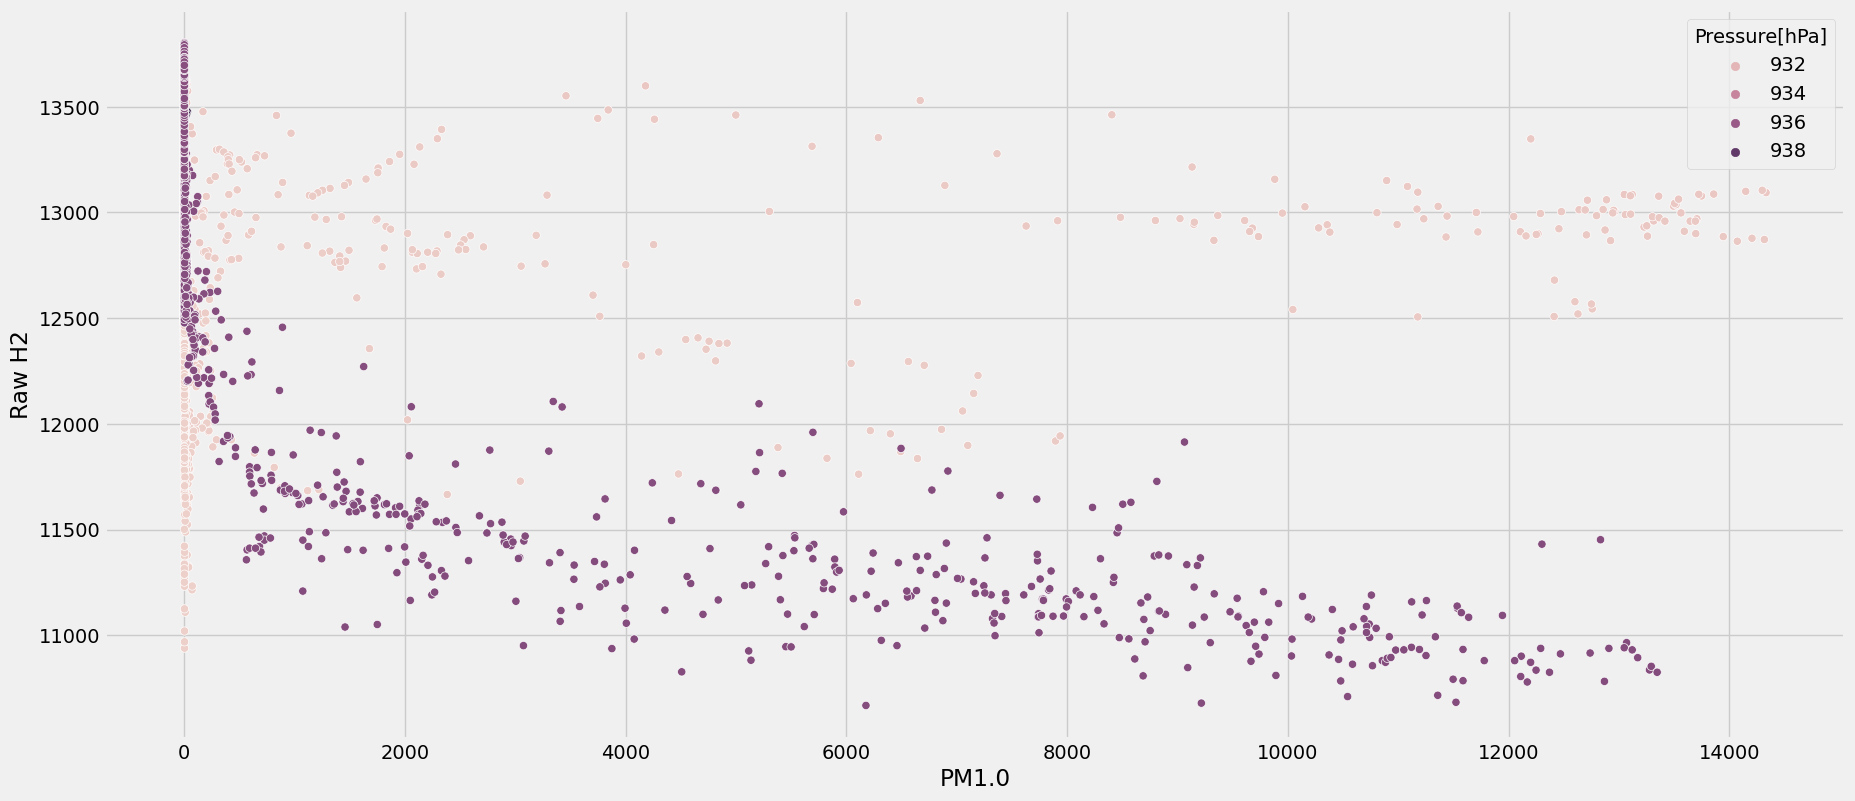

In [8]:
plt.figure(1 , figsize = (20 , 9))
sns.scatterplot(x = 'PM1.0' , y  = 'Raw H2' , hue = 'Pressure[hPa]' , data = df_smokeDetection)
plt.show()

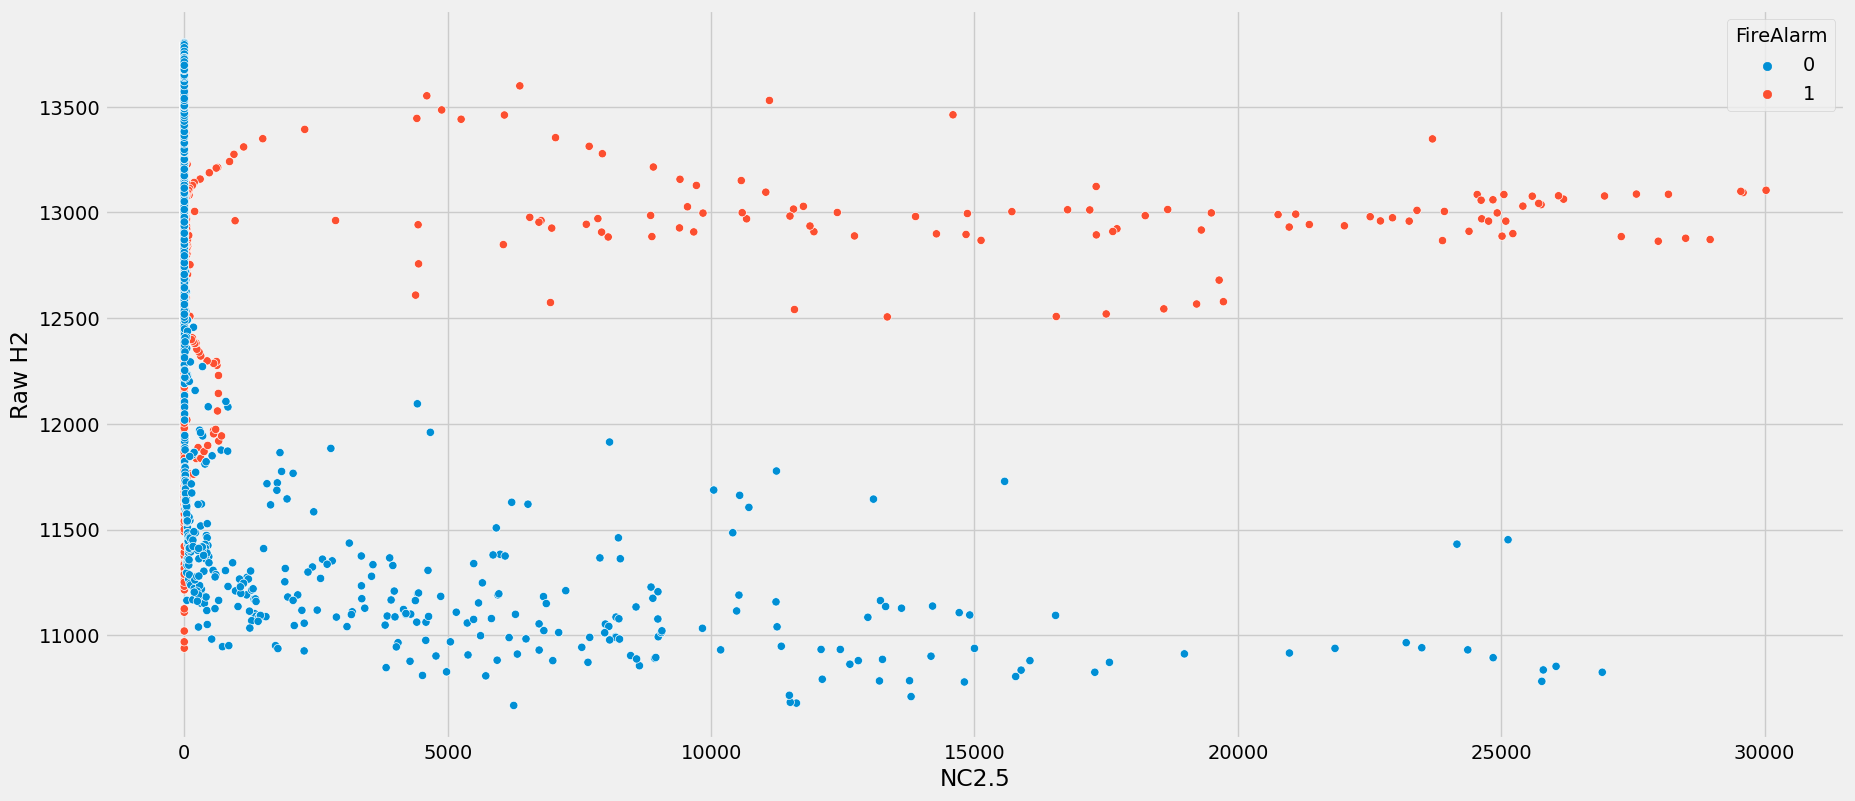

In [9]:
plt.figure(1 , figsize = (20 , 9))
sns.scatterplot(x = 'NC2.5' , y  = 'Raw H2' , hue = 'FireAlarm' , data = df_smokeDetection)
plt.show()

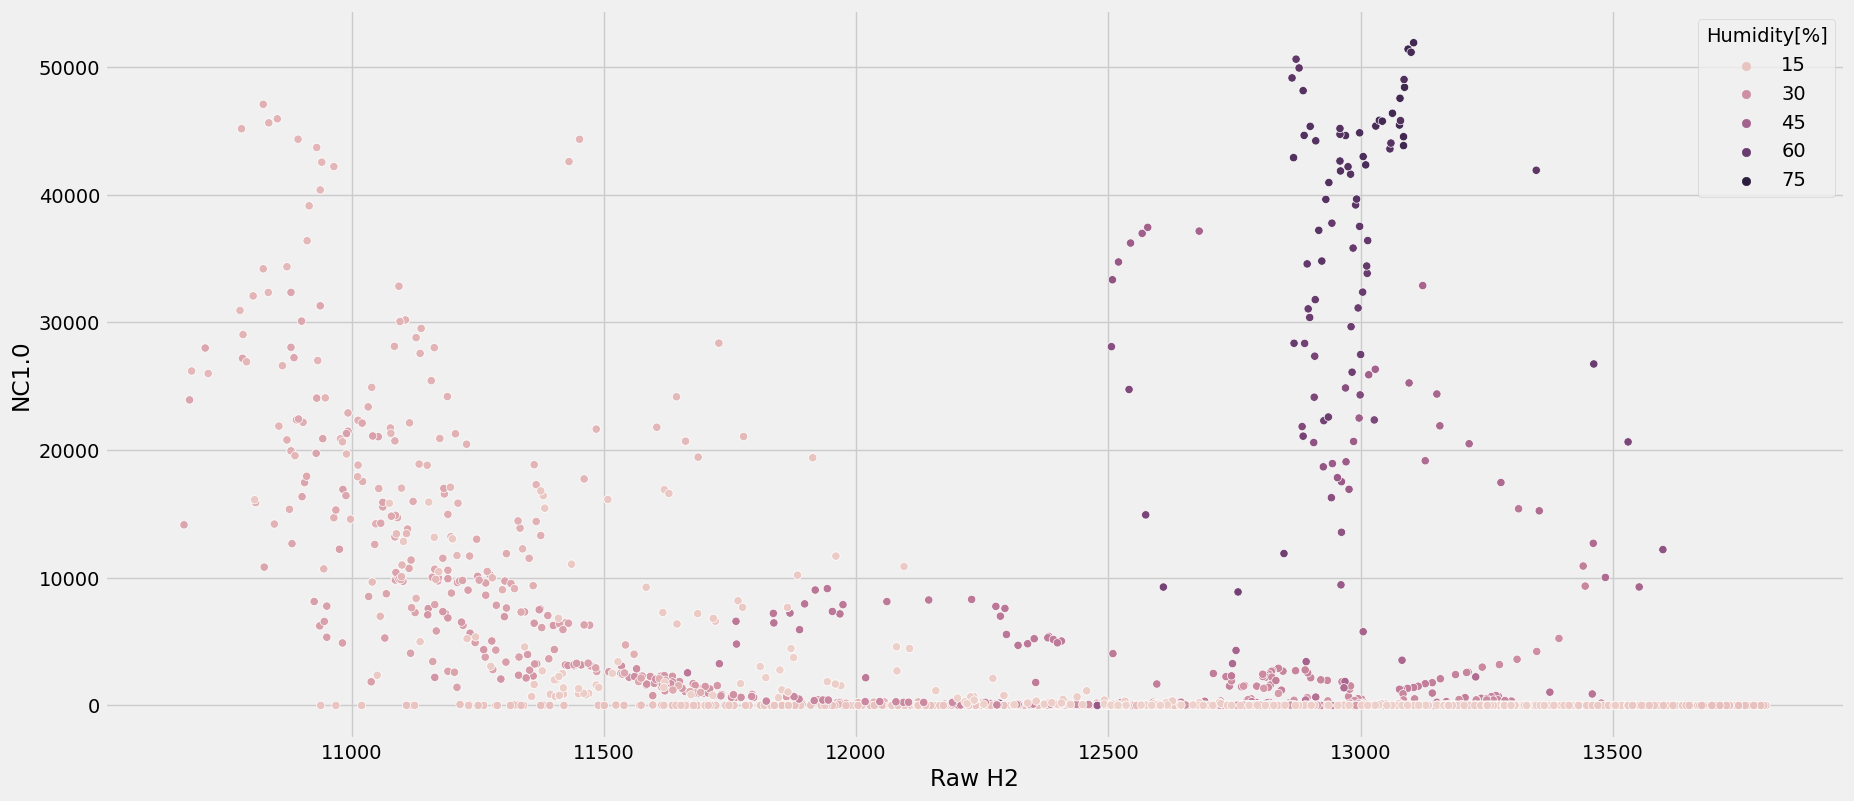

In [10]:
plt.figure(1 , figsize = (20 , 9))
sns.scatterplot(x = 'Raw H2' , y  = 'NC1.0' , hue = 'Humidity[%]' , data = df_smokeDetection)
plt.show()

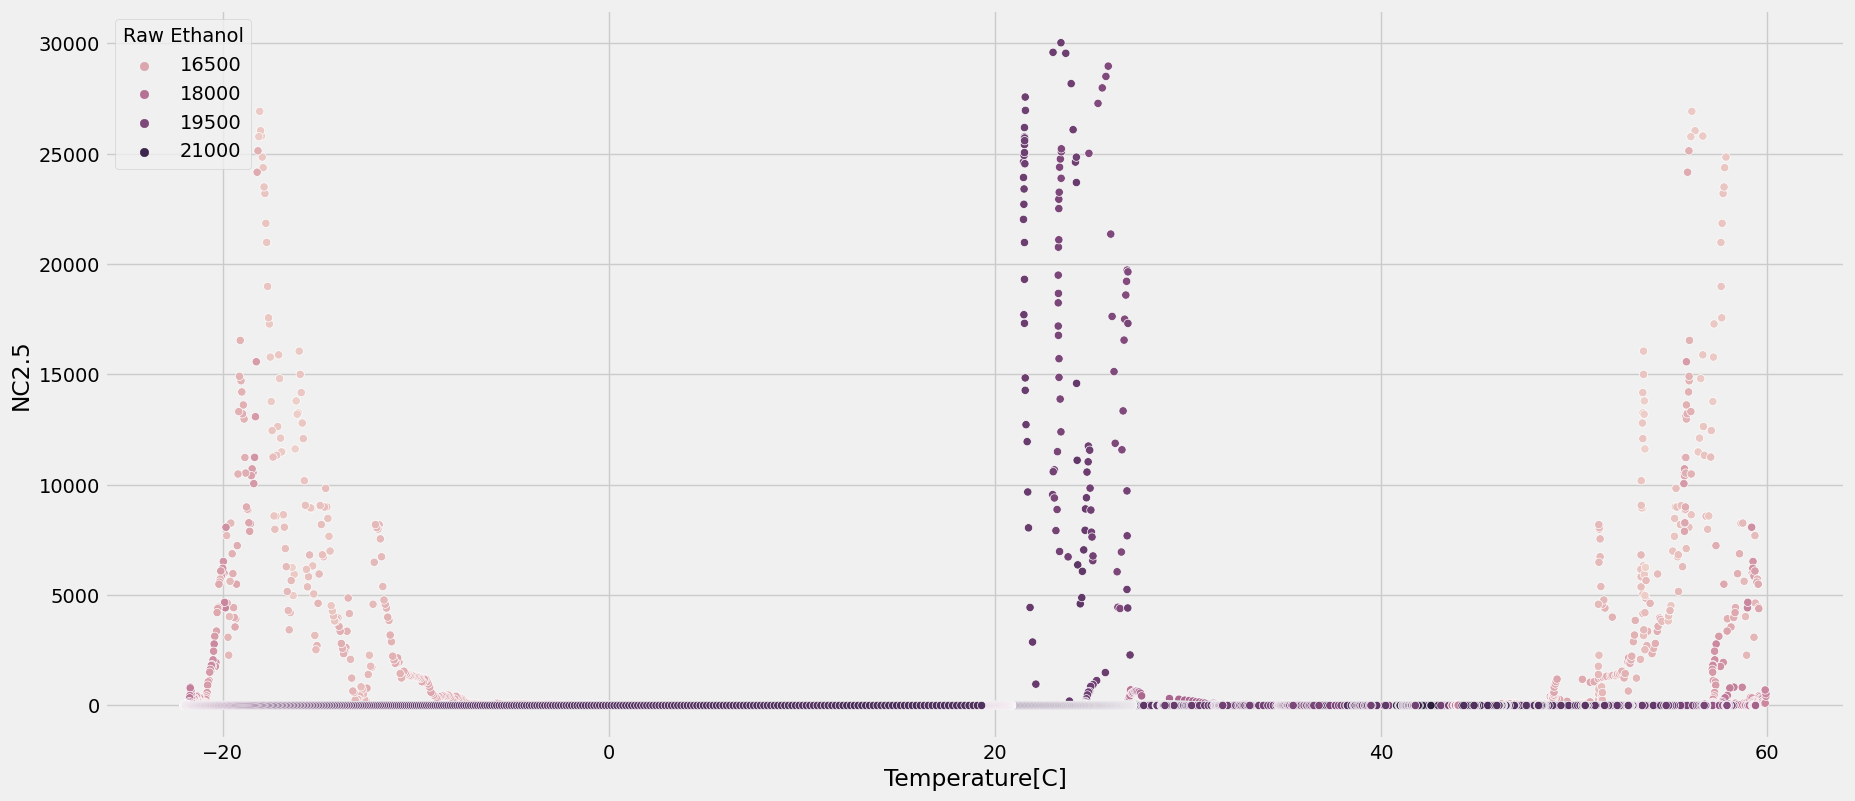

In [11]:
plt.figure(1 , figsize = (20 , 9))
sns.scatterplot(x = 'Temperature[C]' , y  = 'NC2.5' , hue = 'Raw Ethanol' , data = df_smokeDetection)
plt.show()

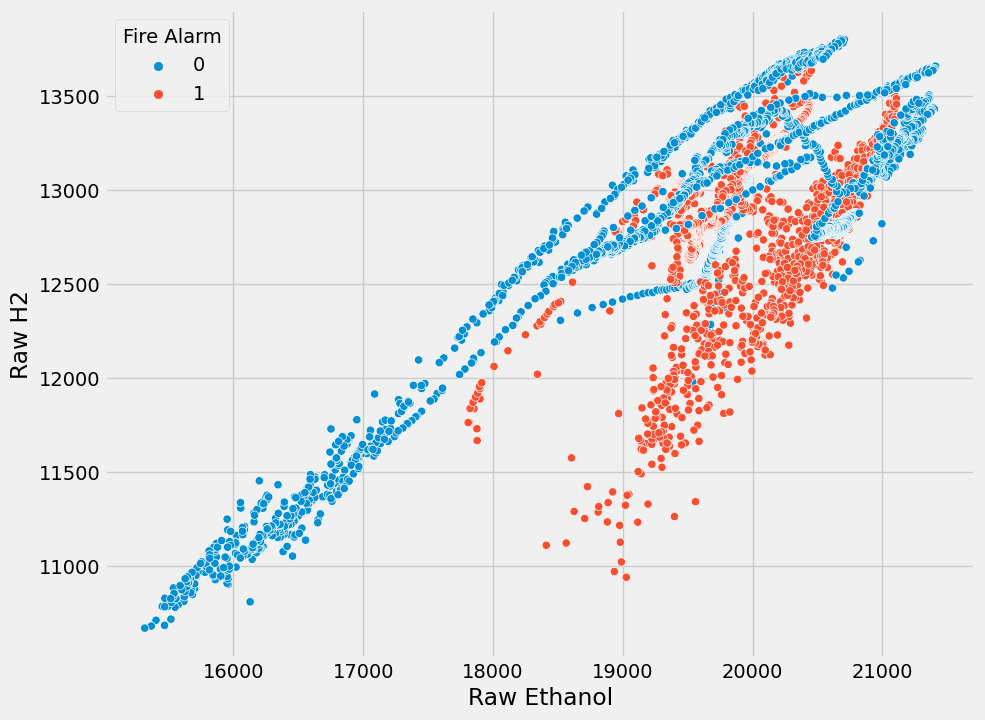

In [12]:
plt.figure(figsize=(10,8))
sns.scatterplot(
    data=df,
    y='Raw H2',
    x='Raw Ethanol',
    hue="Fire Alarm"
)
plt.show()

In [13]:
y = df.pop('Fire Alarm').to_numpy()
x = df

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit,train_test_split
spliter = StratifiedShuffleSplit(n_splits=3, test_size=0.2)
for train_ids, test_ids in spliter.split(x_scaled, y):
    x_train, y_train = x_scaled[train_ids], y[train_ids]
    x_test, y_test = x_scaled[test_ids], y[test_ids]

    x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2)

In [16]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifierModel = RandomForestClassifier(criterion = 'entropy', max_depth=6, n_estimators=200, random_state=44)
RandomForestClassifierModel.fit(x_train, y_train)

print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(x_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(x_test, y_test))

RandomForestClassifierModel Train Score is :  0.9999750517675823
RandomForestClassifierModel Test Score is :  0.9996806642184257


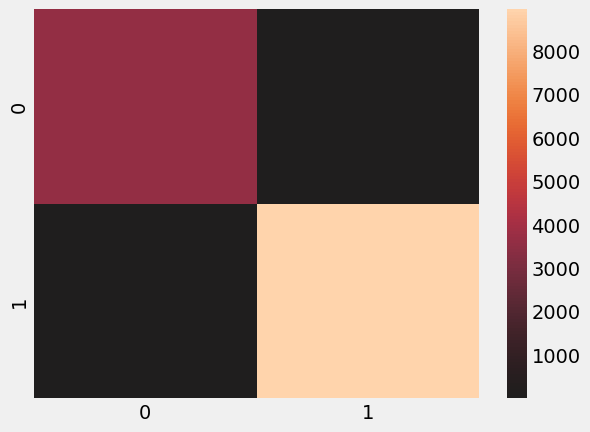

Confusion Matrix is
 [[3572    3]
 [   1 8950]]


In [17]:
y_pred_RF = RandomForestClassifierModel.predict(x_test)
CM_RF = confusion_matrix(y_test, y_pred_RF)

sns.heatmap(CM_RF, center=True)
plt.show()

print('Confusion Matrix is\n', CM_RF)

In [18]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=33) #criterion can be entropy
DecisionTreeClassifierModel.fit(x_train, y_train)

print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(x_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(x_test, y_test))

DecisionTreeClassifierModel Train Score is :  1.0
DecisionTreeClassifierModel Test Score is :  0.9996008302730321


In [19]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1], 
              'gamma': [1, 0.1],
              'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv = 2)
grid.fit(x_train, y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.994 total time=   6.0s
[CV 2/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.994 total time=   5.9s
[CV 1/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.995 total time=   6.0s
[CV 2/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.995 total time=   6.5s
[CV 1/2] END ..........C=1, gamma=1, kernel=rbf;, score=0.997 total time=   3.9s
[CV 2/2] END ..........C=1, gamma=1, kernel=rbf;, score=0.998 total time=   3.3s
[CV 1/2] END ........C=1, gamma=0.1, kernel=rbf;, score=1.000 total time=   2.9s
[CV 2/2] END ........C=1, gamma=0.1, kernel=rbf;, score=1.000 total time=   2.7s


GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1], 'gamma': [1, 0.1], 'kernel': ['rbf']},
             verbose=3)

In [20]:
grid.score(x_train,y_train)

0.9997505176758227

In [21]:
grid.score(x_test,y_test)

0.9995209963276385

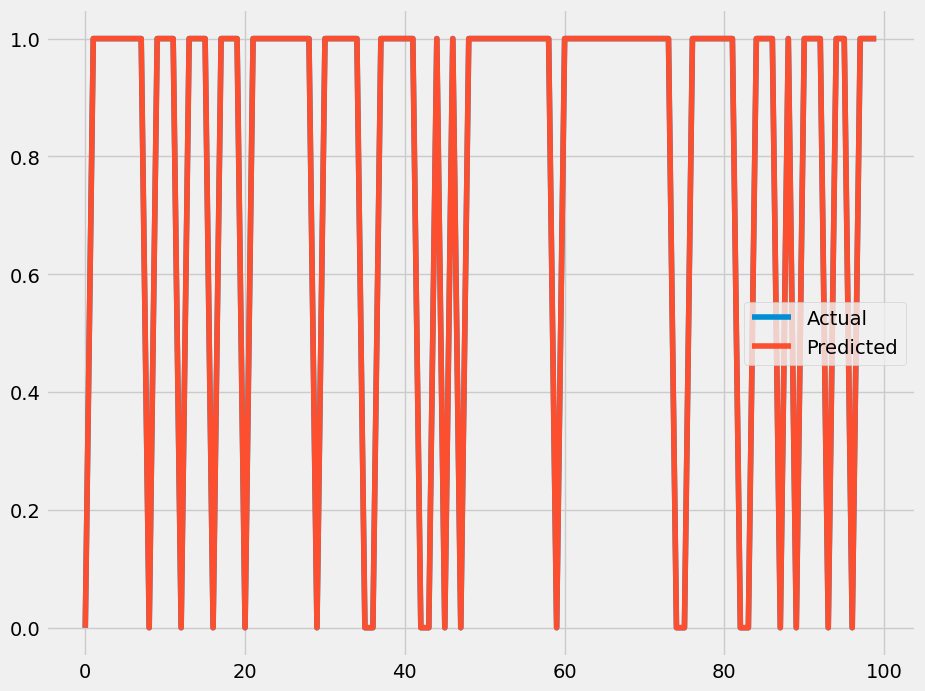

In [22]:
y_pred = grid.predict(x_test)
df = pd.DataFrame({"Y_test" : y_test , "y_pred1": y_pred})
plt.figure(figsize=(10,8))
plt.plot(df[:100])
plt.legend(["Actual" , "Predicted"])

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3575
           1       1.00      1.00      1.00      8951

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526



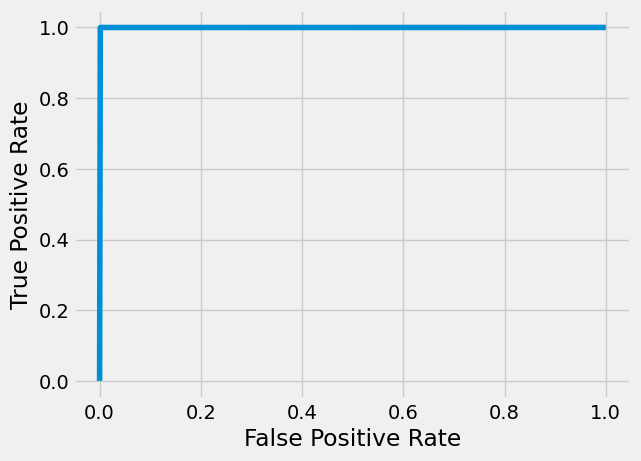

In [24]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()